In [ ]:
# Imports
from mavenn_visualisation_modules import *  # Custom visualisation functions
from config import *  # Configuration file containing file paths and other constants
colour_palette = sns.color_palette("pastel", 4)

# Load train/validation and test data
trainval_df = pd.read_csv(trainval_df_file, sep="\t")  # Train/validation data
test_df = pd.read_csv(test_df_file, sep="\t")          # Test data

# Combine train/validation and test data into a single DataFrame for overall analysis
all_epitopes = pd.concat([trainval_df, test_df]).reset_index(drop=True)

# Load results for single-epitope analysis, drop missing values, and reset indices
results_double_triple_single_epitope = (
    pd.read_csv(double_triple_single_epitope_results_file, sep="\t")
    .dropna()
    .reset_index(drop=True)
)

# Load results for all-epitope analysis, drop missing values, and reset indices
results_double_triple = (
    pd.read_csv(double_triple_results_file, sep="\t")
    .dropna()
    .reset_index(drop=True)
)

# Combine train/validation and test data into a single DataFrame for further analysis
combined_df = pd.concat([trainval_df, test_df]).reset_index(drop=True)

# Print distributions of singles, doubles, and triples in train/validation and test datasets
print(
    "Number of singles, doubles, and triples in train/validation data:",
    trainval_df.groupby('dist').count()['y']
)
print(
    "Number of singles, doubles, and triples in test data:",
    test_df.groupby('dist').count()['y']
)


Number of singles, doubles, and triples in train/validation data: dist
1      209
2     7965
3    45340
Name: y, dtype: int64
Number of singles, doubles, and triples in test data: dist
2     1962
3    11246
Name: y, dtype: int64


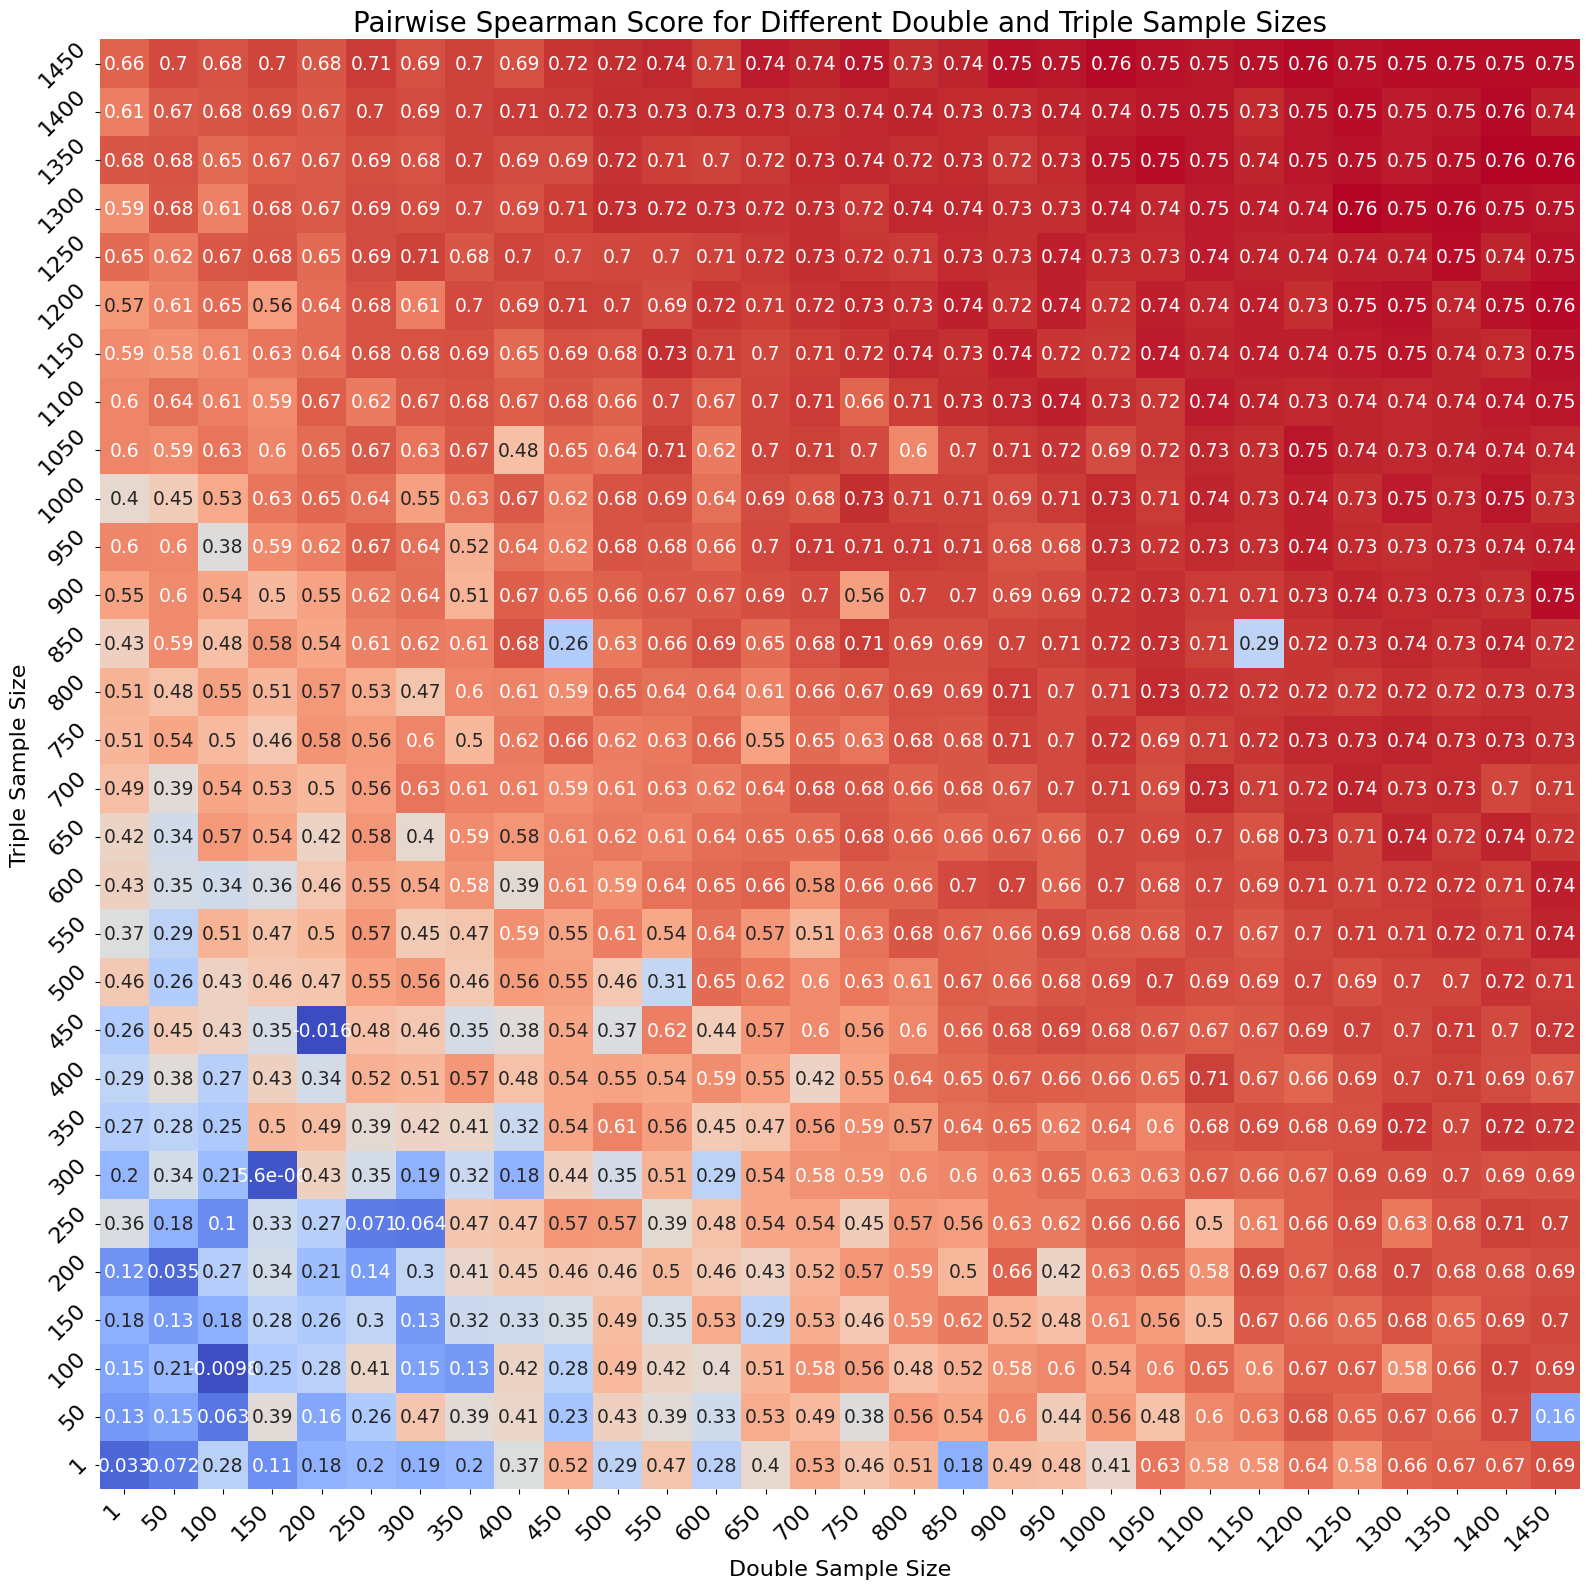

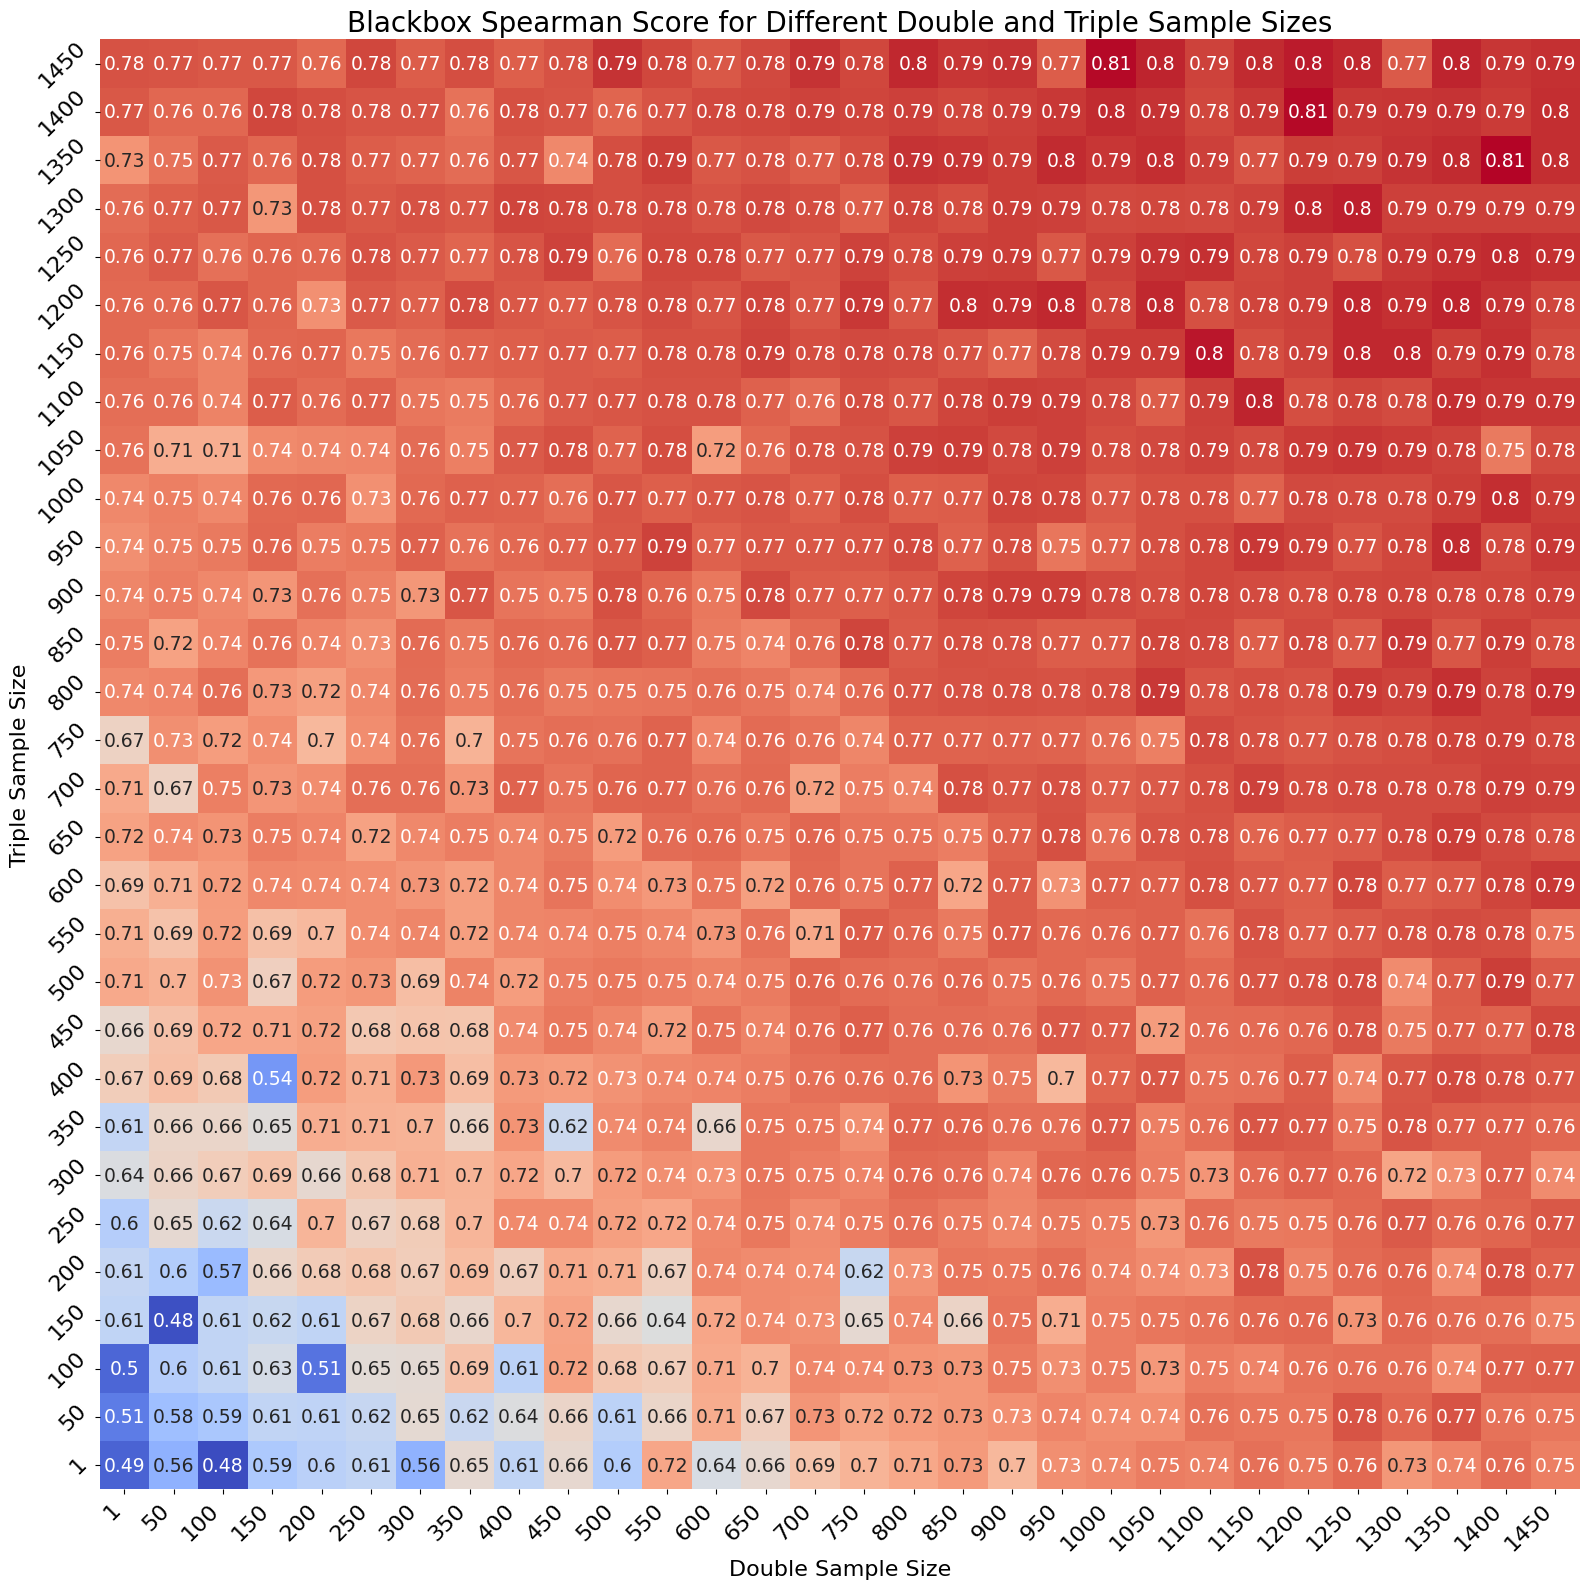

In [ ]:
# Plot a heatmap of Spearman's Rho for different numbers of doubles and triples.
for model in ['pairwise', 'blackbox']:
    double_triple_heatmap(df = results_double_triple, model = model, metric = 'spearman', out_dir = f"{DIR}/figs/", max_double = 1500, max_triple = 1500)

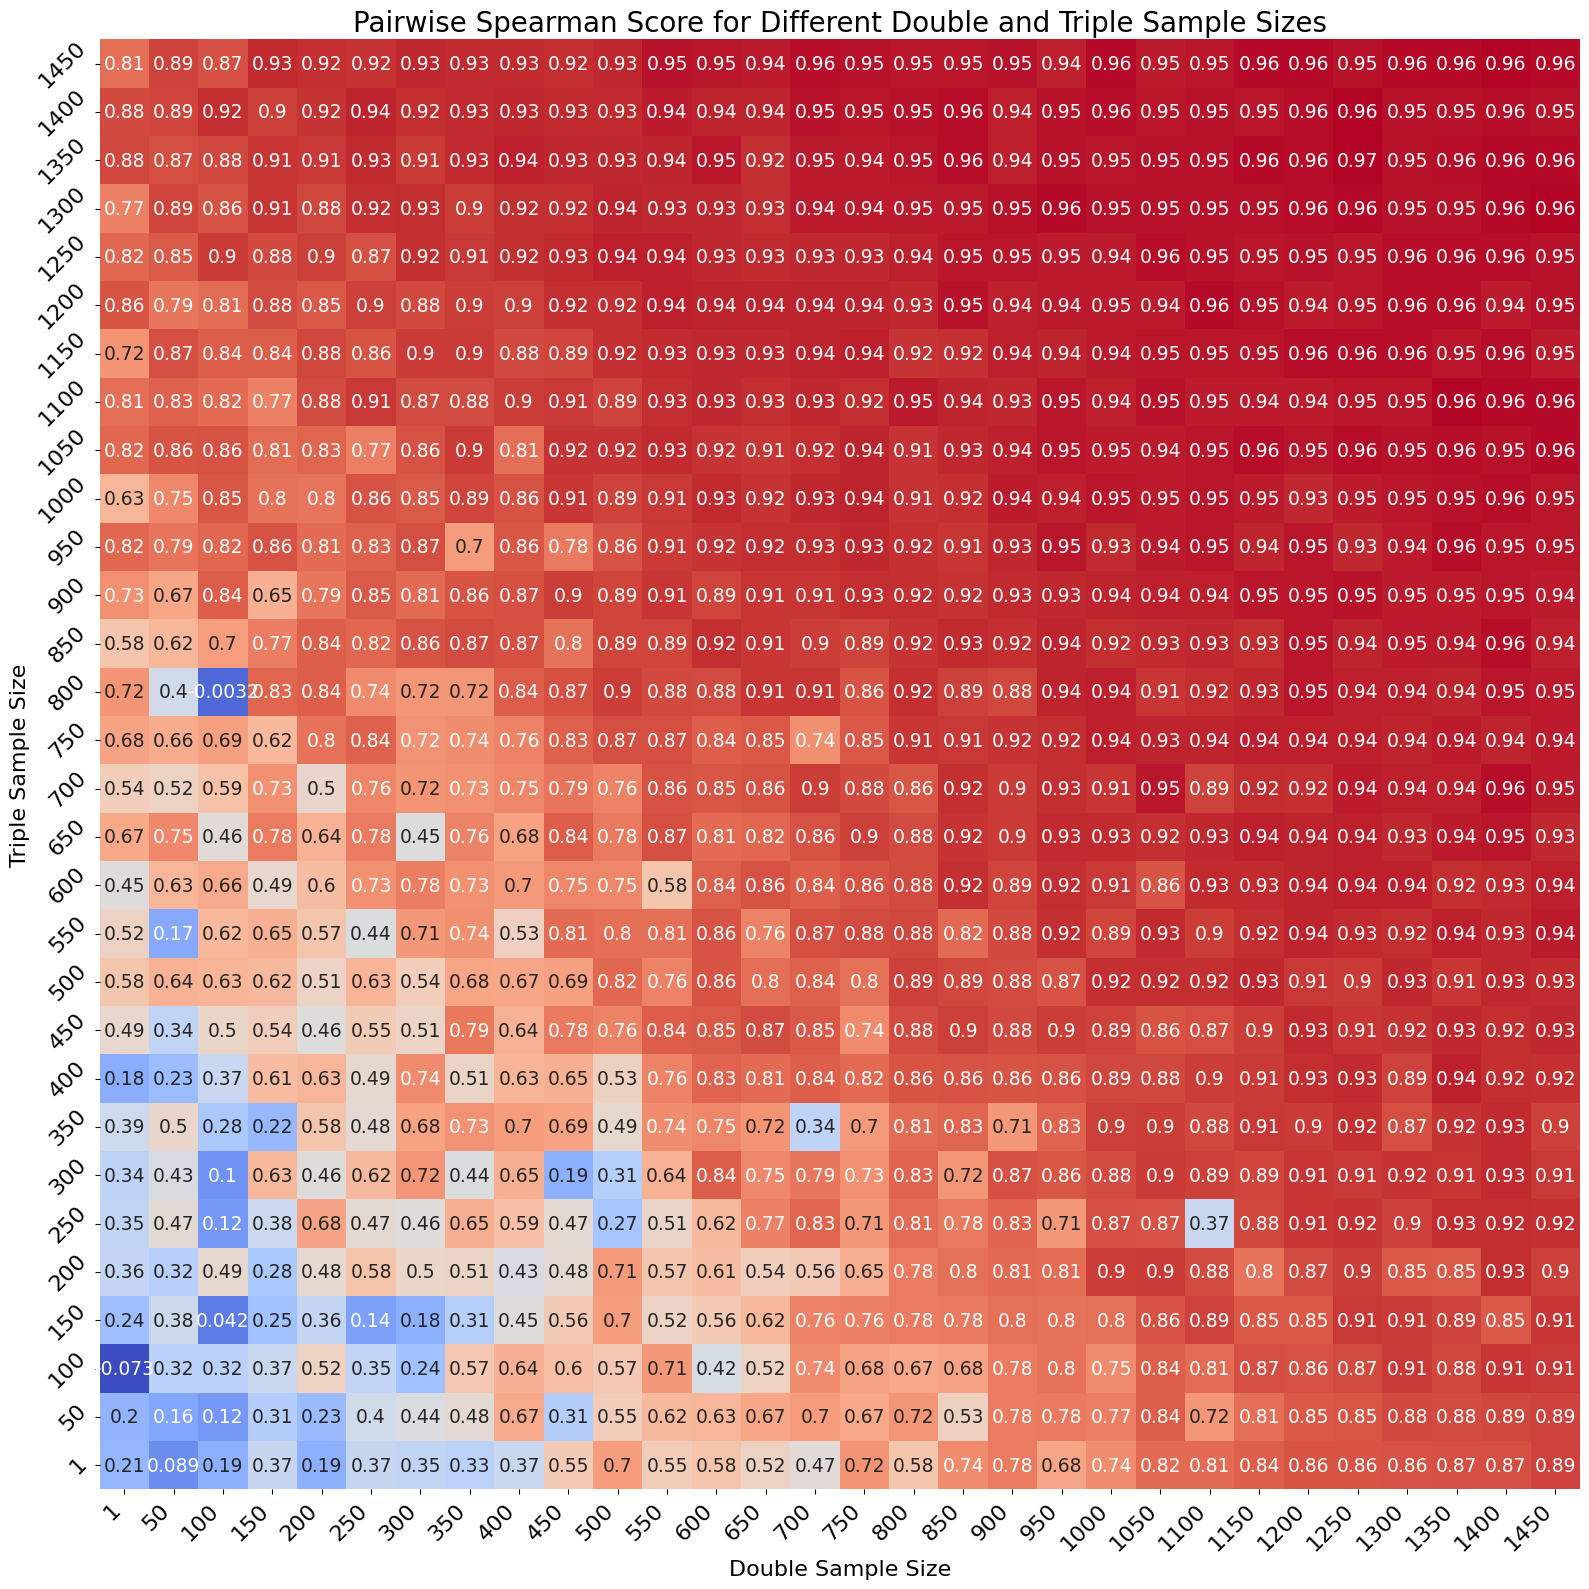

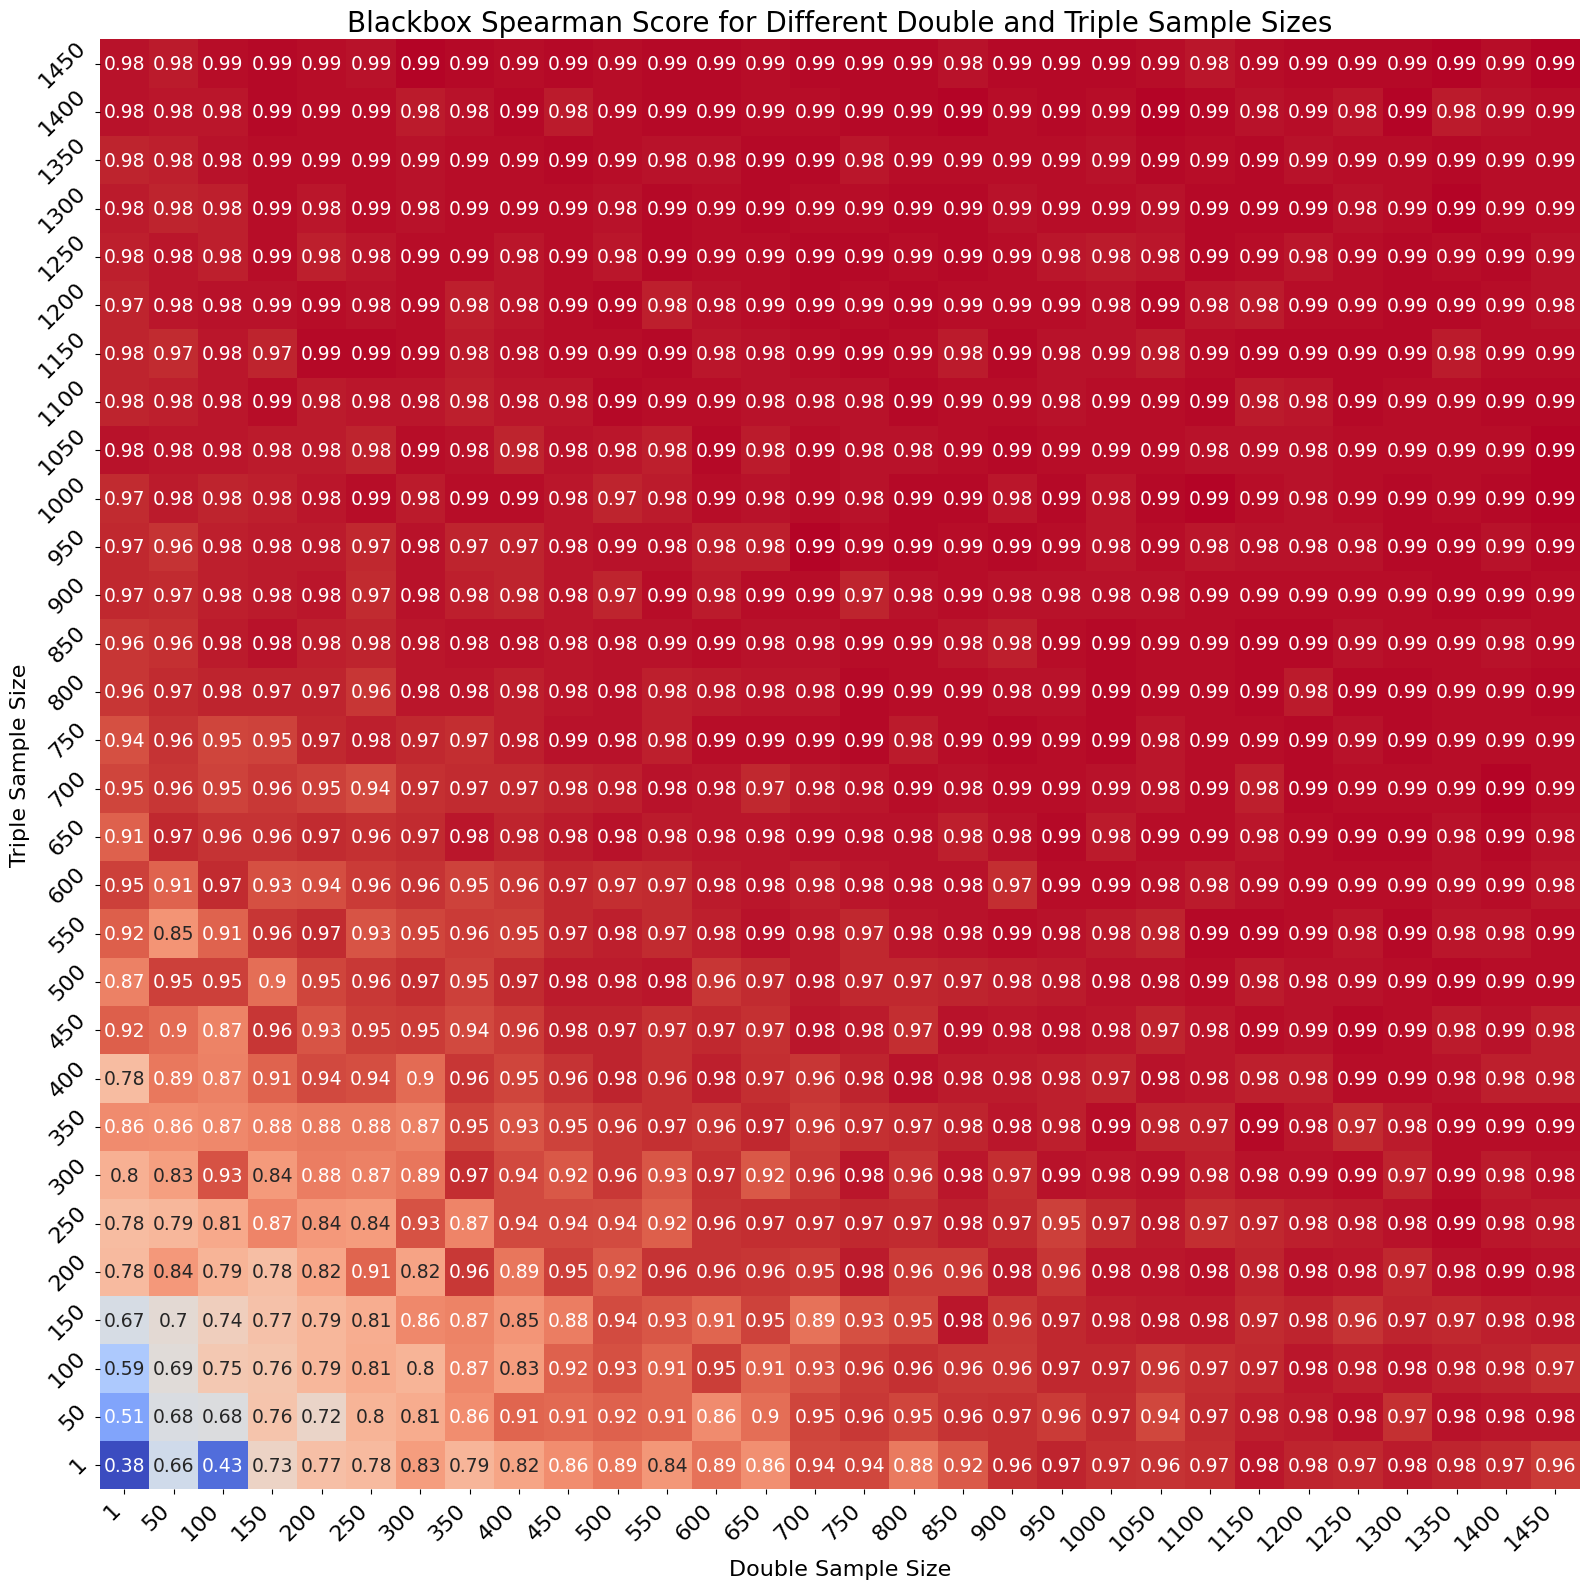

In [ ]:
# Plot a heatmap of Spearman's Rho for different numbers of doubles and triples for a single epitope.
for model in ['pairwise', 'blackbox']:
    double_triple_heatmap(df = results_double_triple_single_epitope, model = model, metric = 'spearman', out_dir = f"{DIR}/figs/", max_double = 1500, max_triple = 1500)

Plot saved to /Users/uw20204/Desktop/tidy/Roche_work/global_epistasis//sample_size_epitope_switching.png


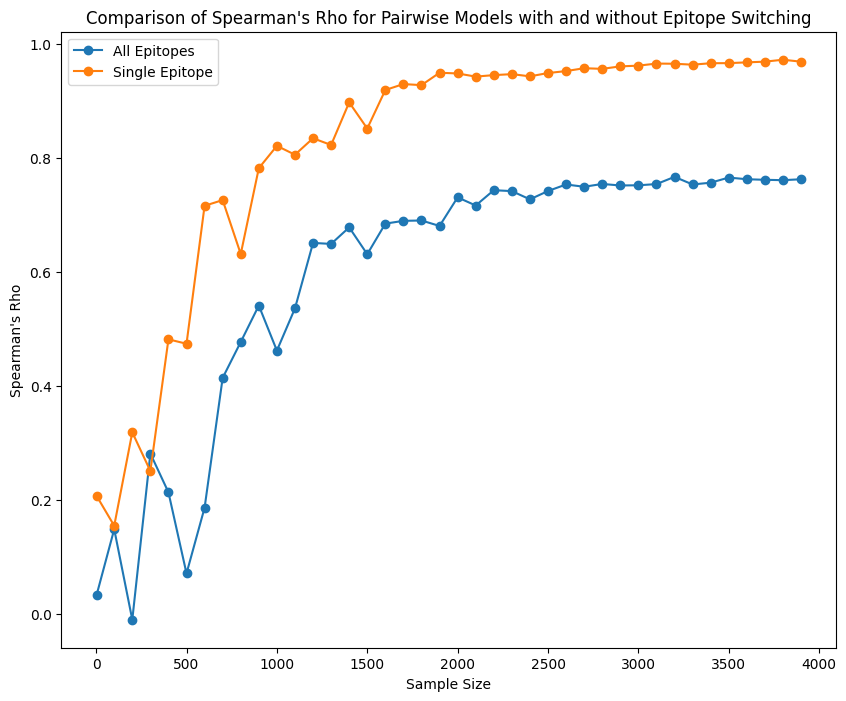

In [16]:
# Compare results for epitope switching contraints
plot_spearman_comparison(
    results_all_epitopes=results_double_triple, 
    results_single_epitope=results_double_triple_single_epitope,
    gpmap_type='pairwise',
    max_sample_size=2000,
    save_path=f"{DIR}/sample_size_epitope_switching.png"
)
